In [99]:
import os
import pandas as pd

base_dir = "../../Data"
base_csv_path = os.path.join(base_dir, 'm4_imputed.csv')
assert os.path.exists(base_csv_path), f"{base_csv_path} does not exist"

df = pd.read_csv(base_csv_path)


In [100]:
import os
import pandas as pd

base_dir = "../../Data"
base_csv_path = os.path.join(base_dir, 'base_cleaned.csv')
assert os.path.exists(base_csv_path), f"{base_csv_path} does not exist"

df_indicator = pd.read_csv(base_csv_path)

print(df.shape)
print(df_indicator.shape)

#Create a list of columns that don't have any missing values
no_missing_cols = [col for col in df_indicator.columns if df_indicator[col].isnull().sum() == 0]

#print length of columns with no missing values
print(len(no_missing_cols))

#Drop the columns with no missing values from df_indicator
df_indicator.drop(columns=no_missing_cols, inplace=True)


print(df_indicator.shape)

df_indicator.sample(15)

(77410, 95)
(77410, 35)
11
(77410, 24)


,tah,vas,onvent,icu,inotropic,wgt_kg_tcr,hgt_cm_tcr,education,func_stat_tcr,diab,...,tot_serum_album,hemo_co_tcr,cig_use,prior_card_surg_tcr,histry_cig_old,init_stat,init_hgt_cm_calc,init_wgt_kg_calc,work_income_tcr,academic_level_tcr
28856,N,N,N,N,NaN,94.0000,178.00,NaN,998.0,NaN,...,NaN,NaN,NaN,U,NaN,2999.0,178.00,94.0000,NaN,NaN
75439,NaN,NaN,NaN,NaN,NaN,89.3580,175.26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2120.0,175.26,89.3580,NaN,NaN
16888,N,N,N,Y,NaN,75.0000,175.00,NaN,998.0,NaN,...,NaN,NaN,NaN,U,NaN,2090.0,175.00,75.0000,NaN,NaN
63116,NaN,NaN,NaN,NaN,NaN,90.7190,171.00,5.0,2040.0,1.0,...,NaN,2.88,N,N,NaN,2020.0,171.00,90.7190,N,NaN
60473,NaN,NaN,NaN,NaN,NaN,80.0000,177.80,3.0,2020.0,1.0,...,4.3,2.30,N,Y,NaN,2020.0,177.80,80.0000,N,NaN
44440,NaN,NaN,NaN,NaN,NaN,65.3173,160.02,6.0,2050.0,1.0,...,4.5,3.10,N,Y,NaN,2030.0,160.02,65.3173,N,NaN
28732,NaN,NaN,NaN,NaN,NaN,81.0000,183.00,998.0,2070.0,3.0,...,3.6,3.10,Y,Y,NaN,2030.0,183.00,81.0000,N,NaN
25441,N,N,N,Y,NaN,78.0000,180.00,NaN,998.0,NaN,...,NaN,NaN,NaN,U,NaN,2030.0,180.00,78.0000,NaN,NaN
37678,N,N,N,N,N,64.8600,173.00,998.0,2.0,1.0,...,NaN,5.32,NaN,U,Y,2030.0,173.00,64.8600,NaN,NaN
72745,NaN,NaN,NaN,NaN,NaN,114.6700,177.80,5.0,2060.0,1.0,...,NaN,4.50,N,N,NaN,2030.0,177.80,114.3052,N,NaN


In [101]:
from sklearn.impute import MissingIndicator
import pandas as pd
import numpy as np

# Replace 'None' values with 'NaN'
#df_indicator.replace('None', np.nan, inplace=True)

# Initialize the MissingIndicator
indicator = MissingIndicator()

# Create the indicator matrix
indicator_matrix = indicator.fit_transform(df_indicator)

# Print the first 5 rows of the indicator matrix
print(indicator_matrix[:5])

# Code false to 0 and true to 1 in indicator_matrix
indicator_matrix = indicator_matrix.astype(int)

# Print the first 5 rows of the indicator matrix
print(indicator_matrix[:5])


# Convert the indicator matrix to a DataFrame
indicator_df = pd.DataFrame(indicator_matrix, columns=df_indicator.columns + '_missing')

#Print shapes of original DataFrame and indicator DataFrame
print(df_indicator.shape)
print(indicator_df.shape)

# Concatenate the original DataFrame and the indicator DataFrame
df = pd.concat([df, indicator_df], axis=1)

# Print the indicator DataFrame
print(df.shape)

indicator_df.sample(15)

[[False False False False False False  True False False False False False
  False  True  True  True  True False False False  True False  True  True]
 [ True  True  True  True  True False False False False False False False
  False False False False False False  True False False False False  True]
 [False False False False False False False False False False False False
  False  True  True False  True False False False False False  True  True]
 [False False False False False False False False False False False False
  False  True  True False  True False False False False False  True  True]
 [False False False False  True False False  True False  True  True  True
   True  True  True  True  True False  True False False False  True  True]]
[[0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1]
 [0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1]

,tah_missing,vas_missing,onvent_missing,icu_missing,inotropic_missing,wgt_kg_tcr_missing,hgt_cm_tcr_missing,education_missing,func_stat_tcr_missing,diab_missing,...,tot_serum_album_missing,hemo_co_tcr_missing,cig_use_missing,prior_card_surg_tcr_missing,histry_cig_old_missing,init_stat_missing,init_hgt_cm_calc_missing,init_wgt_kg_calc_missing,work_income_tcr_missing,academic_level_tcr_missing
7002,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
34085,1,1,1,1,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
42024,1,1,1,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
14750,1,1,1,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
6203,1,1,1,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
74650,1,1,1,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
34022,1,1,1,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
66038,1,1,1,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
28940,1,1,1,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
15482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1


In [102]:
#Print number of missing values in wl_tme
print(f'Number of missing values in wl_time: {df["wl_time"].isnull().sum()}')

#Print number of values in wl_time
print(f'Number of values in wl_time: {df["wl_time"].count()}')

wl_median = df['wl_time'].median()

#Print median for wl_time
print(f'Median for wl_time: {wl_median}')

#Code wl_time to 0 if wl_time is is less than the median else 1
df['wl_time'] = df['wl_time'].apply(lambda x: 0 if x < wl_median else 1)

#Print percentage of 0 and 1 in wl_time
print(f'Percentage of 0 and 1 in wl_time: \n{df["wl_time"].value_counts(normalize=True) * 100}')

#Print number of missing values in wl_time
print(f'Number of missing values in wl_time: {df["wl_time"].isnull().sum()}')

Number of missing values in wl_time: 0
Number of values in wl_time: 77410
Median for wl_time: 78.0
Percentage of 0 and 1 in wl_time: 
1    50.188606
0    49.811394
Name: wl_time, dtype: float64
Number of missing values in wl_time: 0


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X = df.drop(['wl_time'], axis=1)
y = df['wl_time']

one_hot_cols = [col for col in df.columns if df[col].nunique() == 2]
columns_to_scale = [col for col in X.columns if col not in one_hot_cols]

scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [104]:
from sklearn.model_selection import cross_val_predict

log = LogisticRegression(max_iter=1000)
f1_scores = cross_val_score(log, X, y, cv=5, scoring='f1').mean()
print(f"F1 score pre feature selection: {f1_scores}")

f1_macro_scores = cross_val_score(log, X, y, cv=5, scoring='f1_macro').mean()
print(f"F1 macro score pre feature selection: {f1_macro_scores}")

F1 score pre feature selection: 0.6660096571880224
F1 macro score pre feature selection: 0.6659188406942114


In [105]:
import numpy as np

log.fit(X, y)

# Get the coefficients (log odds) of the logistic regression model
coefficients = log.coef_[0]

# Calculate the odds ratio for each feature
odds_ratios = np.exp(coefficients)

# Display the odds ratio for each feature
for feature, odds_ratio in zip(X.columns, odds_ratios):
    print(f"Feature: {feature}, Odds Ratio: {odds_ratio}")

f1_scores = cross_val_score(log, X, y, cv=5, scoring='f1').mean()
print(f"F1 score pre feature selection: {f1_scores}")

f1_macro_scores = cross_val_score(log, X, y, cv=5, scoring='f1_macro').mean()
print(f"F1 macro score pre feature selection: {f1_macro_scores}")


Feature: thoracic_dgn, Odds Ratio: 0.9245649085177778
Feature: wgt_kg_tcr, Odds Ratio: 1.5025293696725917
Feature: hgt_cm_tcr, Odds Ratio: 1.4254037429273196
Feature: func_stat_tcr, Odds Ratio: 0.7888921928480604
Feature: most_rcnt_creat, Odds Ratio: 1.0031923300195058
Feature: tot_serum_album, Odds Ratio: 1.2725980797657013
Feature: hemo_co_tcr, Odds Ratio: 1.0058745386596364
Feature: init_stat, Odds Ratio: 1.0498948359605542
Feature: init_age, Odds Ratio: 1.0204365569634815
Feature: init_hgt_cm_calc, Odds Ratio: 0.7197503939738206
Feature: init_wgt_kg_calc, Odds Ratio: 1.1162295554337982
Feature: num_prev_tx_0, Odds Ratio: 0.8500119364023759
Feature: num_prev_tx_1, Odds Ratio: 0.8548086300182536
Feature: num_prev_tx_2, Odds Ratio: 0.7506672087287848
Feature: num_prev_tx_3, Odds Ratio: 1.7450950553215212
Feature: num_prev_tx_4, Odds Ratio: 1.4695204290865544
Feature: num_prev_tx_5, Odds Ratio: 0.766583869000847
Feature: num_prev_tx_6, Odds Ratio: 0.852899307254183
Feature: num_prev_tx

<Axes: >

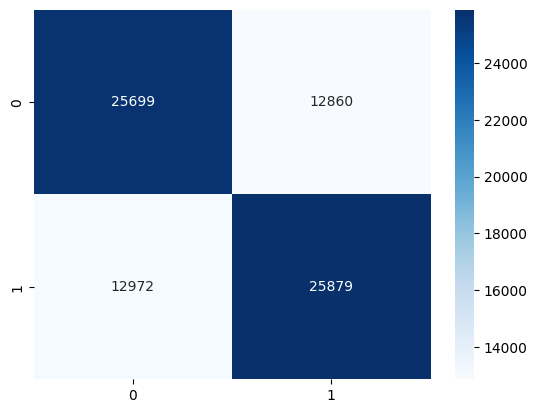

In [106]:
import seaborn as sns

y_pred = cross_val_predict(log, X, y, cv=5)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='Blues', fmt='g')